In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2e719c28bf5f52d75d8ee21e60b98c94b9dc2ac09d7fd9e6090cbc3f5860c8e2
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


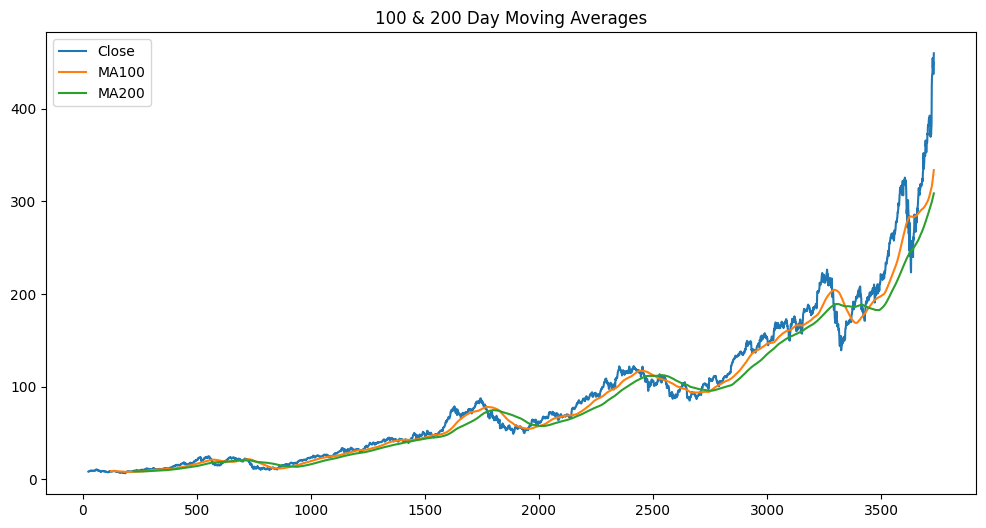

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3658 - val_loss: 0.4923
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1041 - val_loss: 0.5239
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0752 - val_loss: 0.4309
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0447 - val_loss: 0.4200
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0360 - val_loss: 0.3248
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0277 - val_loss: 0.2899
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0242 - val_loss: 0.2972
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0180 - val_loss: 0.2909
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0163 - val_loss: 0.2301
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0144 - val_loss: 0.2506
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0132 - val_loss: 0.2246
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0114 - val_l

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


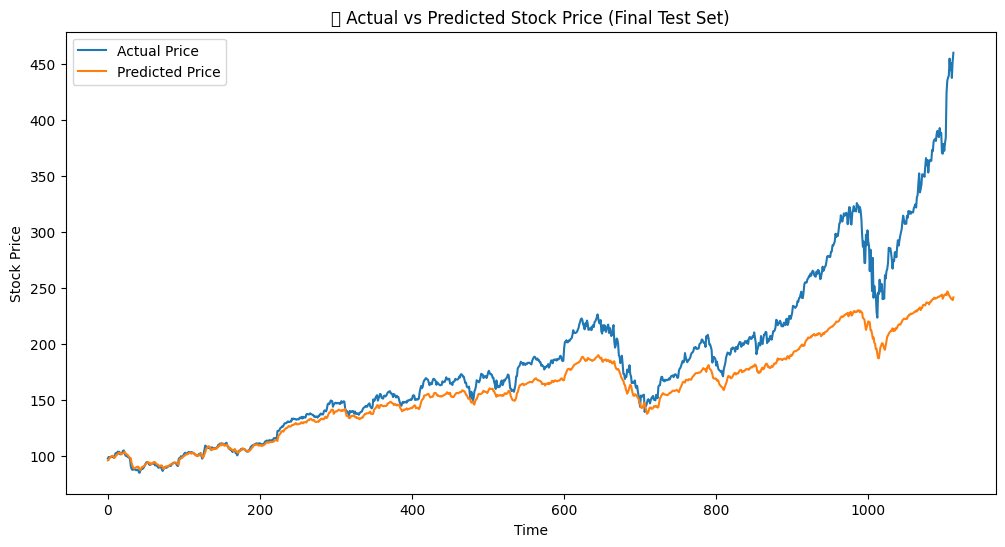

✅ MAE: 25.7938
✅ RMSE: 43.1724
✅ R² Score: 0.6387


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


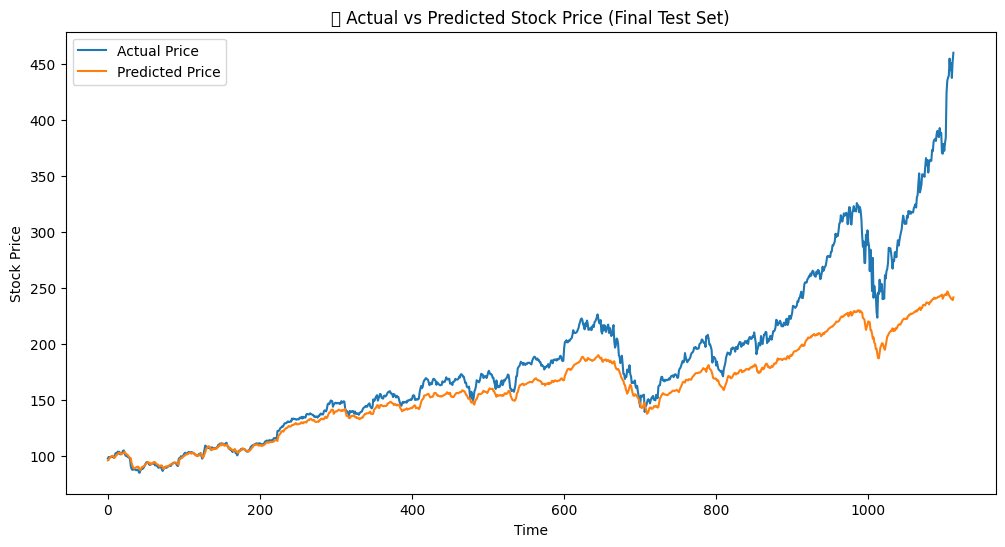

✅ MAE: 25.7938
✅ RMSE: 43.1724
✅ R² Score: 0.6387


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
import ta

# 📁 Load data
df = pd.read_csv("AAPL.csv")
df = df.dropna()

# Drop Date if present
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# ➕ Add RSI and MACD indicators
df['RSI'] = ta.momentum.RSIIndicator(df['Close(t)']).rsi()
df['MACD'] = ta.trend.MACD(df['Close(t)']).macd()
df = df.dropna()

# 📊 Plot MA100 and MA200
plt.figure(figsize=(12, 6))
plt.plot(df["Close(t)"], label='Close')
plt.plot(df["Close(t)"].rolling(100).mean(), label='MA100')
plt.plot(df["Close(t)"].rolling(200).mean(), label='MA200')
plt.legend()
plt.title("100 & 200 Day Moving Averages")
plt.show()

# 🧠 Feature and target setup
features = df[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD']]
target = df[['Close(t)']]  # DataFrame shape

# 🔀 Train-test split
train_size = int(len(df) * 0.7)
x_train_raw = features[:train_size]
x_test_raw = features[train_size:]
y_train_raw = target[:train_size]
y_test_raw = target[train_size:]

# 🔄 Scaling
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

x_train = feature_scaler.fit_transform(x_train_raw)
x_test = feature_scaler.transform(x_test_raw)

y_train = target_scaler.fit_transform(y_train_raw)
y_test = target_scaler.transform(y_test_raw)

# ⏳ Create sequences
def create_sequences(x, y, window_size=100):
    x_seq, y_seq = [], []
    for i in range(window_size, len(x)):
        x_seq.append(x[i-window_size:i])
        y_seq.append(y[i])
    return np.array(x_seq), np.array(y_seq)

x_train_seq, y_train_seq = create_sequences(x_train, y_train, 100)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, 100)

# 🧠 Build RNN model
model = Sequential()
model.add(SimpleRNN(60, return_sequences=True, input_shape=(x_train_seq.shape[1], x_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(60))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(x_train_seq, y_train_seq, epochs=50, batch_size=64, validation_data=(x_test_seq, y_test_seq))

# 🔮 Final prediction setup using last 100 days of training + full test data
past_100_days_features = x_train_raw[-100:]  # last 100 days from training features
final_features_df = pd.concat([past_100_days_features, x_test_raw], ignore_index=True)

# ⚖️ Rescale using fitted feature scaler
final_features_scaled = feature_scaler.transform(final_features_df)

# 📈 Create new test sequences
x_final = []
for i in range(100, final_features_scaled.shape[0]):
    x_final.append(final_features_scaled[i-100:i])

x_final = np.array(x_final)

# 🔮 Make predictions
y_pred_scaled = model.predict(x_final)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# 📌 True target values (shifted due to sequence window)

# 📌 Get actual values aligned with predictions
y_final = y_test_raw.reset_index(drop=True)
y_final = y_final[0:len(y_pred)]  # Match prediction length

# Inverse transform to original price
y_final_scaled = target_scaler.transform(y_final)
y_final = target_scaler.inverse_transform(y_final_scaled)

# 📊 Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_final, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('📈 Actual vs Predicted Stock Price (Final Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📋 Evaluation metrics
mae = mean_absolute_error(y_final, y_pred)
rmse = np.sqrt(mean_squared_error(y_final, y_pred))
r2 = r2_score(y_final, y_pred)

print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


# 📊 Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_final, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('📈 Actual vs Predicted Stock Price (Final Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📋 Evaluation metrics
mae = mean_absolute_error(y_final, y_pred)
rmse = np.sqrt(mean_squared_error(y_final, y_pred))
r2 = r2_score(y_final, y_pred)

print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


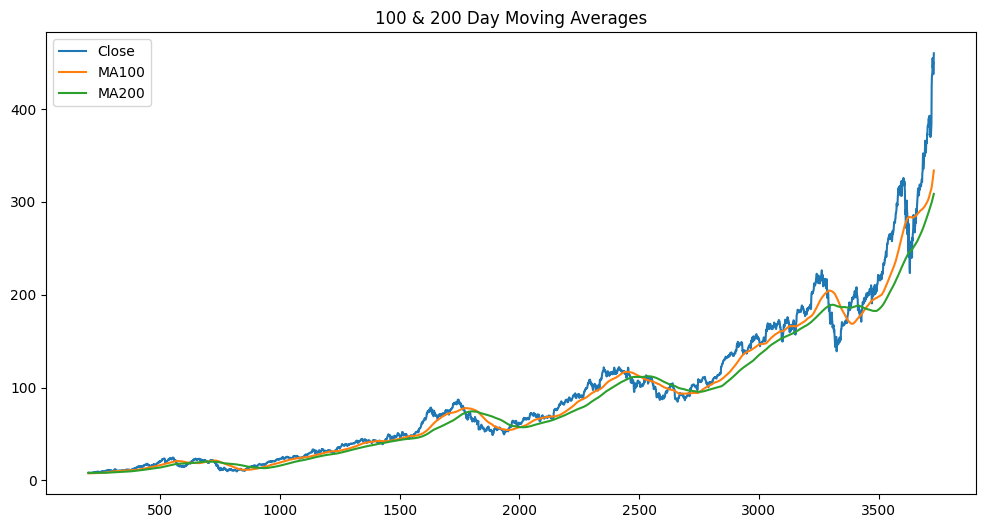

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.5853 - val_loss: 0.3541
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.3063 - val_loss: 0.3911
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.2157 - val_loss: 0.3876
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.1805 - val_loss: 0.3114
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.1644 - val_loss: 0.3529
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.1128 - val_loss: 0.3218
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0837 - val_loss: 0.3741
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0625 - val_loss: 0.3665
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0570 - val_loss: 0.3339
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0454 - val_loss: 0.4131
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0447 - val_loss: 0.4070
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


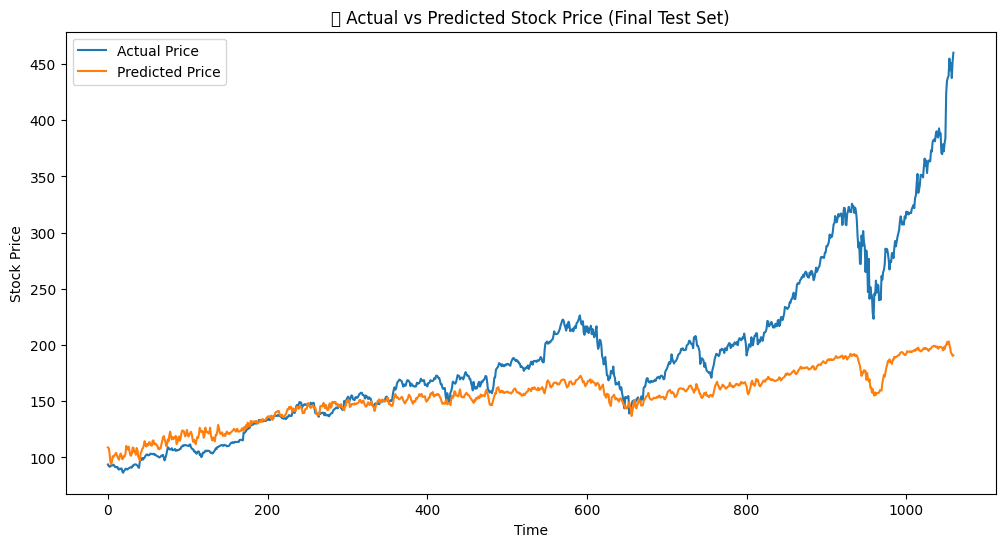

✅ MAE: 38.5863
✅ RMSE: 60.6803
✅ R² Score: 0.2645


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import ta

# 📁 Load data
df = pd.read_csv("AAPL.csv")
df = df.dropna()

# Drop Date if present
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# ➕ Add indicators
df['RSI'] = ta.momentum.RSIIndicator(df['Close(t)']).rsi()
df['MACD'] = ta.trend.MACD(df['Close(t)']).macd()
df["MA100"] = df["Close(t)"].rolling(100).mean()
df["MA200"] = df["Close(t)"].rolling(200).mean()
df = df.dropna()

# 📊 Plot MA100 and MA200
plt.figure(figsize=(12, 6))
plt.plot(df["Close(t)"], label='Close')
plt.plot(df["MA100"], label='MA100')
plt.plot(df["MA200"], label='MA200')
plt.legend()
plt.title("100 & 200 Day Moving Averages")
plt.show()

# 🧠 Features and target
features = df[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'MA100', 'MA200']]
target = df[['Close(t)']]

# 🔀 Train-test split
train_size = int(len(df) * 0.7)
x_train_raw = features[:train_size]
x_test_raw = features[train_size:]
y_train_raw = target[:train_size]
y_test_raw = target[train_size:]

# 🔄 Scaling
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

x_train = feature_scaler.fit_transform(x_train_raw)
x_test = feature_scaler.transform(x_test_raw)

y_train = target_scaler.fit_transform(y_train_raw)
y_test = target_scaler.transform(y_test_raw)

# ⏳ Create sequences
def create_sequences(x, y, window_size=100):
    x_seq, y_seq = [], []
    for i in range(window_size, len(x)):
        x_seq.append(x[i-window_size:i])
        y_seq.append(y[i])
    return np.array(x_seq), np.array(y_seq)

x_train_seq, y_train_seq = create_sequences(x_train, y_train, 100)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, 100)

# 🧠 Improved RNN model
model = Sequential()
model.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train_seq.shape[1], x_train_seq.shape[2])))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(32))
model.add(Dropout(0.2))
model.add(Dense(1))

# 🔧 Compile with smaller learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

# 🛑 Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🏋️ Train model
history = model.fit(
    x_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)

# 🔮 Final prediction using past 100 days + full test data
past_100_days_features = x_train_raw[-100:]
final_features_df = pd.concat([past_100_days_features, x_test_raw], ignore_index=True)
final_features_scaled = feature_scaler.transform(final_features_df)

x_final = []
for i in range(100, final_features_scaled.shape[0]):
    x_final.append(final_features_scaled[i-100:i])
x_final = np.array(x_final)

# 📈 Predict
y_pred_scaled = model.predict(x_final)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# 📌 Actual values (align with prediction)
y_final = y_test_raw.reset_index(drop=True)
y_final = y_final[0:len(y_pred)]

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_final, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('📈 Actual vs Predicted Stock Price (Final Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📋 Evaluation metrics
mae = mean_absolute_error(y_final, y_pred)
rmse = np.sqrt(mean_squared_error(y_final, y_pred))
r2 = r2_score(y_final, y_pred)

print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.4925 - val_loss: 0.0154
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2517 - val_loss: 0.0184
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.1885 - val_loss: 0.0593
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.1291 - val_loss: 0.0610
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1073 - val_loss: 0.0247
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0943 - val_loss: 0.0189
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0726 - val_loss: 0.0345
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0608 - val_loss: 0.0126
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0520 - val_loss: 0.0188
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0465 - val_loss: 0.0148
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0379 - val_loss: 0.0195
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


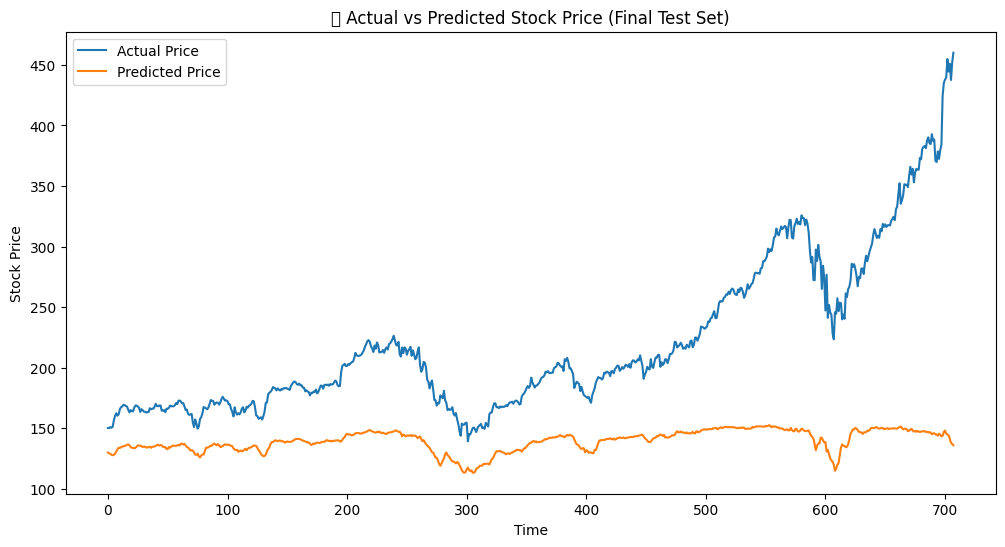

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import ta

# 📁 Load data
df = pd.read_csv("AAPL.csv")
df = df.dropna()

# Drop Date if present
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# ➕ Add RSI and MACD indicators
df['RSI'] = ta.momentum.RSIIndicator(df['Close(t)']).rsi()
df['MACD'] = ta.trend.MACD(df['Close(t)']).macd()
df["MA100"] = df["Close(t)"].rolling(100).mean()
df["MA200"] = df["Close(t)"].rolling(200).mean()
df = df.dropna()

# 🧠 Feature and target setup
features = df[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'MA100', 'MA200']]
target = df[['Close(t)']]

# 📊 Train-Validation-Test split
train_size = int(len(df) * 0.6)
val_size = int(len(df) * 0.2)

x_train_raw = features[:train_size]
x_val_raw = features[train_size:train_size + val_size]
x_test_raw = features[train_size + val_size:]

y_train_raw = target[:train_size]
y_val_raw = target[train_size:train_size + val_size]
y_test_raw = target[train_size + val_size:]

# 🔄 Scaling
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

x_train = feature_scaler.fit_transform(x_train_raw)
x_val = feature_scaler.transform(x_val_raw)
x_test = feature_scaler.transform(x_test_raw)

y_train = target_scaler.fit_transform(y_train_raw)
y_val = target_scaler.transform(y_val_raw)
y_test = target_scaler.transform(y_test_raw)

# ⏳ Create sequences
def create_sequences(x, y, window_size=100):
    x_seq, y_seq = [], []
    for i in range(window_size, len(x)):
        x_seq.append(x[i-window_size:i])
        y_seq.append(y[i])
    return np.array(x_seq), np.array(y_seq)

x_train_seq, y_train_seq = create_sequences(x_train, y_train, 100)
x_val_seq, y_val_seq = create_sequences(x_val, y_val, 100)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, 100)

# 🧠 Build RNN model
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(x_train_seq.shape[1], x_train_seq.shape[2])),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# 🛑 Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🏋️‍♂️ Train model
history = model.fit(
    x_train_seq, y_train_seq,
    validation_data=(x_val_seq, y_val_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 🔮 Prepare for final prediction
last_100 = x_val_raw[-100:]
final_input = pd.concat([last_100, x_test_raw], ignore_index=True)
final_input_scaled = feature_scaler.transform(final_input)

x_final = []
for i in range(100, final_input_scaled.shape[0]):
    x_final.append(final_input_scaled[i-100:i])
x_final = np.array(x_final)

# Predict
y_pred_scaled = model.predict(x_final)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

# Actual values
y_final = y_test_raw.reset_index(drop=True)
y_final = y_final[:len(y_pred)]

# 📋 Evaluation
mae = mean_absolute_error(y_final, y_pred)
rmse = np.sqrt(mean_squared_error(y_final, y_pred))
r2 = r2_score(y_final, y_pred)

print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# 📊 Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_final, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('📈 Actual vs Predicted Stock Price (Final Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Trial 10 Complete [00h 00m 11s]
val_loss: 0.013941888697445393

Best val_loss So Far: 0.0021671385038644075
Total elapsed time: 00h 01m 28s
53/90 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

📊 Performance on Train Set (RNN):
   R²:   0.9938
   MAE:  2.1431
   MSE:  7.8993
   RMSE: 2.8106
   MAPE: 157.92%

📊 Performance on Validation Set (RNN):
   R²:   0.9405
   MAE:  4.1472
   MSE:  33.5264
   RMSE: 5.7902
   MAPE: 15.26%

📊 Performance on Test Set (RNN):
   R²:   0.6960
   MAE:  25.4589
   MSE:  1378.9867
   RMSE: 37.1347
   MAPE: 24.36%


<ipython-input-19-291faa2a04f8>:130: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


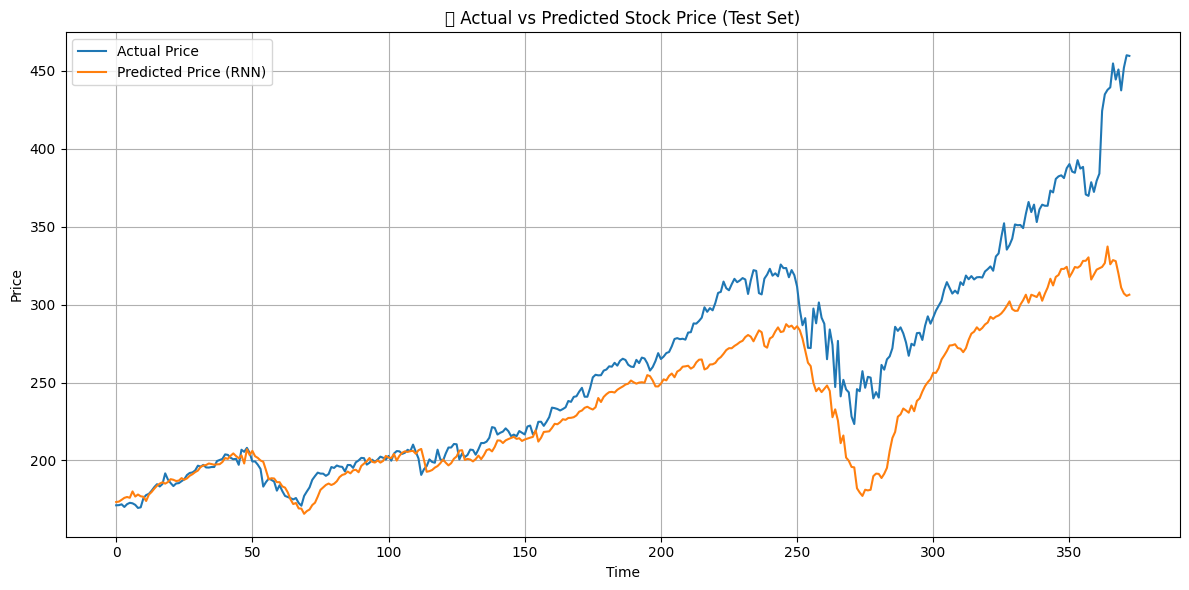

In [ ]:
# 🧠 Copy original data
df = pd.read_csv("AAPL.csv")

# 🎯 Target variable (next-day forecast)
df['target'] = df['Close_forcast'].shift(-1)

# === Feature Engineering ===
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close(t)'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close(t)'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close(t)'].pct_change(3)
df['ret_5d'] = df['Close(t)'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

# 🧹 Cleanup
drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')
df.dropna(inplace=True)

# --- NEW: Drop non-numeric columns (like Date) ---
non_numeric_cols = df.select_dtypes(include=['object', 'datetime']).columns.tolist()
print(f"Dropping non-numeric columns before scaling: {non_numeric_cols}")
df.drop(columns=non_numeric_cols, inplace=True, errors='ignore')

# 🔄 Features and target
X = df.drop(columns='target')
y = df['target']

# 📆 Time-series train/val/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, shuffle=False)

# 📊 Scaling
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = MinMaxScaler()
y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_Y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1))

# 🔄 Reshape for RNN: (samples, time_steps=1, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_rnn = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 🔧 Hyperparameter tuning with keras_tuner for RNN
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=32),
                        activation='tanh',
                        input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('lr', [1e-3, 5e-4, 1e-4])),
        loss='mse'
    )
    return model

# 📌 Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='rnn_tuning',
    project_name='forecast_rnn'
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# 🔍 Search best model
tuner.search(X_train_rnn, y_train_scaled,
             validation_data=(X_val_rnn, y_val_scaled),
             epochs=50,
             batch_size=32,
             callbacks=[early_stop],
             verbose=1)

# ✅ Best model
best_model = tuner.get_best_models(1)[0]

# 🔮 Predictions
y_train_pred = scaler_Y.inverse_transform(best_model.predict(X_train_rnn))
y_val_pred = scaler_Y.inverse_transform(best_model.predict(X_val_rnn))
y_test_pred = scaler_Y.inverse_transform(best_model.predict(X_test_rnn))

y_train_true = y_train.values
y_val_true = y_val.values
y_test_true = y_test.values

# 📏 MAPE + Evaluation Function
def get_mape(y_true, y_pred):
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100

def evaluate_model(y_true, y_pred, label="Set"):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    mape = get_mape(y_true, y_pred)

    print(f"\n📊 Performance on {label}:")
    print(f"   R²:   {r2:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAPE: {mape:.2f}%")

# 📋 Evaluation
evaluate_model(y_train_true, y_train_pred, "Train Set (RNN)")
evaluate_model(y_val_true, y_val_pred, "Validation Set (RNN)")
evaluate_model(y_test_true, y_test_pred, "Test Set (RNN)")

# 📈 Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label='Actual Price')
plt.plot(y_test_pred, label='Predicted Price (RNN)')
plt.title("📈 Actual vs Predicted Stock Price (Test Set)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
